In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
path='C:/Users/Neo4ever/Desktop/da_salary/clean_df'
cleaned_df=pd.read_csv(path)
cleaned_df.shape


(1001, 26)

In [2]:
cleaned_df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'min_salary', 'max_salary', 'avg_clean', 'company_txt',
       'state', 'same_state', 'company_age', 'python', 'sql', 'r', 'aws'],
      dtype='object')

In [3]:
pd.set_option('display.max_rows',None)

In [4]:
cleaned_df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,max_salary,avg_clean,company_txt,state,same_state,company_age,python,sql,r,aws
0,Data Analyst Junior,$42K-$76K (Glassdoor est.),Job Description\nJob description\nInterpret da...,5.0,"Staffigo Technical Services, LLC\n5.0","Chicago, IL","Woodridge, IL",51 to 200 employees,2008,Company - Private,...,76,59.0,"Staffigo Technical Services, LLC\n",IL,0,13,0,1,1,1
1,Junior Data Analyst,$30K-$54K (Glassdoor est.),Job Description\nJob description\nInterpret da...,5.0,"Staffigo Technical Services, LLC\n5.0","Gainesville, FL","Woodridge, IL",51 to 200 employees,2008,Company - Private,...,54,42.0,"Staffigo Technical Services, LLC\n",FL,0,13,0,1,1,1
2,Data Warehouse Analyst,$47K-$76K (Glassdoor est.),Job description:\nWorking within IT to transla...,5.0,Purity Technology LLC\n5.0,"Houston, TX","Cypress, TX",1 to 50 employees,-1,Company - Private,...,76,61.5,Purity Technology LLC\n,TX,0,-1,0,1,1,1
3,Quantitative Data Analyst/Developer,$77K-$132K (Glassdoor est.),Job Description Quantitative Data Analyst/Deve...,5.0,Creative Data Resources\n5.0,"New York, NY","New York, NY",1 to 50 employees,1992,Company - Private,...,132,104.5,Creative Data Resources\n,NY,1,29,1,0,1,0
4,Data Analyst Junior,$30K-$54K (Glassdoor est.),Job Description\nJob description\nInterpret da...,5.0,"Staffigo Technical Services, LLC\n5.0","Gainesville, FL","Woodridge, IL",51 to 200 employees,2008,Company - Private,...,54,42.0,"Staffigo Technical Services, LLC\n",FL,0,13,0,1,1,1


In [5]:
cleaned_df.Founded[cleaned_df.company_txt=='Creative Data Resources'].value_counts()

Series([], Name: Founded, dtype: int64)

In [6]:
#compatators count
cleaned_df.Competitors.value_counts()

-1                                                                                           795
Adecco, Manpower                                                                               9
State Street, Northern Trust, BlackRock                                                        8
Accenture, CGI, Sopra Steria                                                                   6
News Corp, WarnerMedia, NBCUniversal                                                           4
East West Bank, Bank of the West, First Republic Bank                                          4
NewYork-Presbyterian Hospital, Northwell Health                                                4
Robert Half, Insight Global                                                                    4
UCLA Health, City of Hope, Keck Medicine of USC                                                4
Walt Disney Company, NBCUniversal                                                              3
Artech Information Systems, Mi

In [7]:
cleaned_df['num_compitators']=cleaned_df['Competitors'].apply(lambda x: len(x.split(',')) if x!='-1' else 0)

In [8]:
#company txt
cleaned_df['company_txt']=cleaned_df['company_txt'].apply(lambda x: x.replace('\n',''))

<AxesSubplot:>

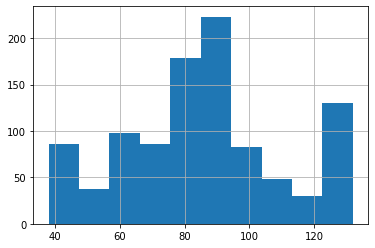

In [9]:
cleaned_df.max_salary.hist()

<AxesSubplot:>

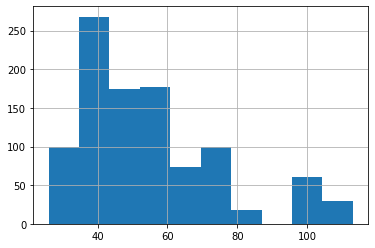

In [10]:
cleaned_df.min_salary.hist()

<AxesSubplot:>

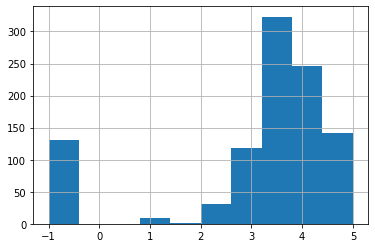

In [11]:
cleaned_df.Rating.hist()

<AxesSubplot:>

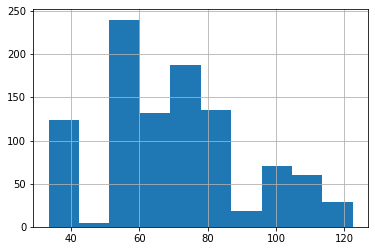

In [12]:
cleaned_df.avg_clean.hist()

In [13]:
cleaned_df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'min_salary', 'max_salary', 'avg_clean', 'company_txt',
       'state', 'same_state', 'company_age', 'python', 'sql', 'r', 'aws',
       'num_compitators'],
      dtype='object')

In [14]:
df_cat=cleaned_df[['Size','Type of ownership', 'Sector', 'Revenue','Easy Apply','avg_clean','state']]

graph for Size: total = 9


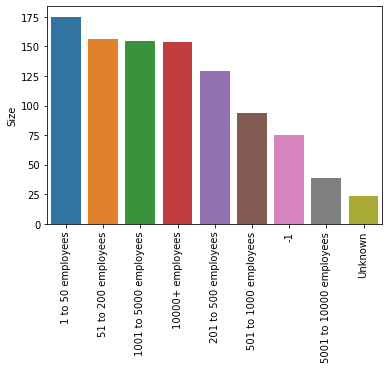

graph for Type of ownership: total = 15


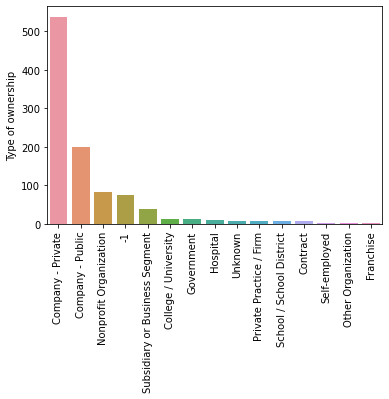

graph for Sector: total = 23


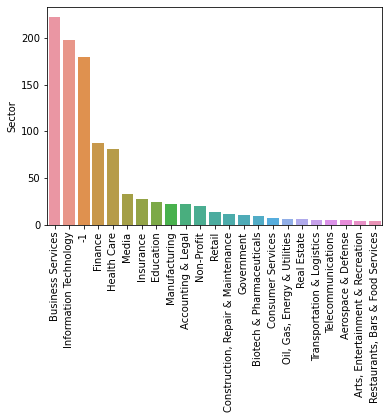

graph for Revenue: total = 14


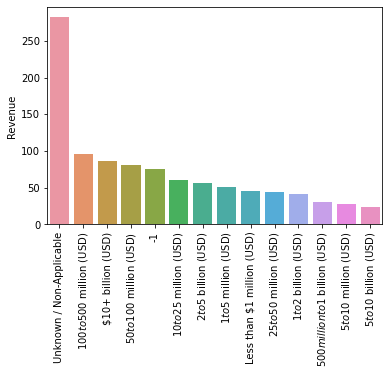

graph for Easy Apply: total = 2


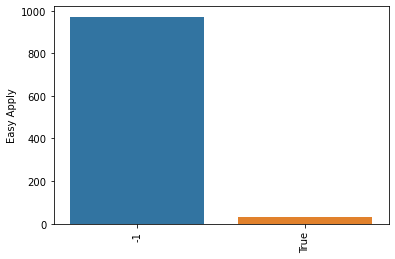

graph for avg_clean: total = 37


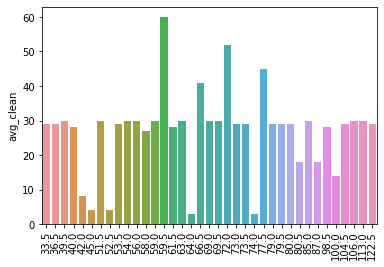

graph for state: total = 9


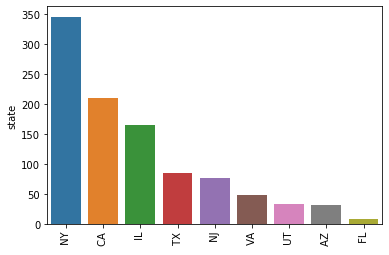

In [15]:
for i in df_cat.columns:
    cat_num=df_cat[i].value_counts()
    
    print("graph for %s: total = %d" % (i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index,y=cat_num)
    plt.xticks(rotation=90)
    plt.show()
          
    

graph for Location: total = 11


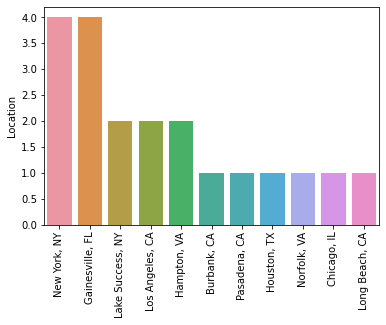

graph for Headquarters: total = 10


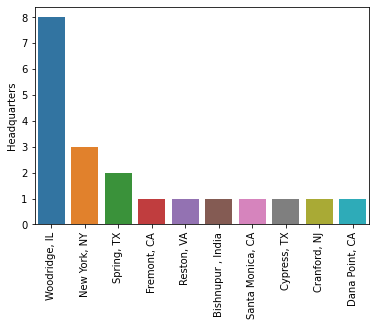

In [16]:
for i in cleaned_df[['Location', 'Headquarters']]:
    cat_num=cleaned_df[i][:20].value_counts()
    
    print("graph for %s: total = %d" % (i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index,y=cat_num)
    plt.xticks(rotation=90)
    plt.show()

In [17]:
#pivot table
cleaned_df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'min_salary', 'max_salary', 'avg_clean', 'company_txt',
       'state', 'same_state', 'company_age', 'python', 'sql', 'r', 'aws',
       'num_compitators'],
      dtype='object')

In [18]:
pd.pivot_table(cleaned_df, index=['state','Sector'], values='avg_clean')

avg_clean
state Sector                                        
 AZ   -1                                   73.700000
      Business Services                    73.500000
      Construction, Repair & Maintenance   73.500000
      Education                            73.666667
      Finance                              73.500000
      Information Technology               73.500000
      Manufacturing                        73.500000
      Non-Profit                           73.500000
      Retail                               73.500000
      Telecommunications                   73.500000
 CA   -1                                   70.117647
      Accounting & Legal                  108.000000
      Aerospace & Defense                  47.000000
      Biotech & Pharmaceuticals            80.000000
      Business Services                    74.847222
      Construction, Repair & Maintenance   75.625000
      Consumer Services                    49.166667
      Education                            64.800000
      Finance                              58.916667
      Government                           79.666667
      Health Care                          78.250000
      Information Technology               68.312500
      Insurance                            83.791667
      Manufacturing                        66.400000
      Media                                68.941176
      Non-Profit                           64.000000
      Real Estate                          71.000000
      Retail                               65.250000
 FL   Education                            42.000000
      Health Care                          42.000000
      Information Technology               42.000000
      Insurance                            42.000000
 IL   -1                                   82.369565
      Accounting & Legal                   78.642857
      Arts, Entertainment & Recreation     63.000000
      Biotech & Pharmaceuticals            90.625000
      Business Services                    78.910256
      Construction, Repair & Maintenance   79.500000
      Education                            66.277778
      Finance                              70.588235
      Government                           70.250000
      Health Care                          82.500000
      Information Technology               80.192308
      Insurance                            77.500000
      Manufacturing                        76.750000
      Media                                77.500000
      Non-Profit                           66.500000
      Oil, Gas, Energy & Utilities         79.500000
      Restaurants, Bars & Food Services    59.000000
      Retail                               86.875000
      Transportation & Logistics           89.200000
 NJ   -1                                   81.333333
      Arts, Entertainment & Recreation     72.000000
      Biotech & Pharmaceuticals            54.250000
      Business Services                    73.605263
      Construction, Repair & Maintenance   39.500000
      Consumer Services                    59.500000
      Finance                              74.833333
      Health Care                         105.250000
      Information Technology               72.550000
      Insurance                            76.833333
      Non-Profit                           39.500000
      Oil, Gas, Energy & Utilities         39.500000
      Retail                               58.000000
 NY   -1                                   71.942623
      Accounting & Legal                   74.857143
      Arts, Entertainment & Recreation     75.750000
      Biotech & Pharmaceuticals            88.250000
      Business Services                    76.195946
      Construction, Repair & Maintenance   85.000000
      Consumer Services                    66.333333
      Education                            70.166667
      Finance                              67.064516
      Government                           69.500000
      Health Ca

In [19]:
pd.set_option('display.max_rows',None)

In [20]:
pd.pivot_table(cleaned_df, index=['state','Sector'], values='avg_clean').sort_values(by='state')

avg_clean
state Sector                                        
 AZ   -1                                   73.700000
      Retail                               73.500000
      Non-Profit                           73.500000
      Manufacturing                        73.500000
      Information Technology               73.500000
      Telecommunications                   73.500000
      Education                            73.666667
      Construction, Repair & Maintenance   73.500000
      Business Services                    73.500000
      Finance                              73.500000
 CA   Health Care                          78.250000
      Retail                               65.250000
      Real Estate                          71.000000
      Non-Profit                           64.000000
      Media                                68.941176
      Manufacturing                        66.400000
      Insurance                            83.791667
      Information Technology               68.312500
      Government                           79.666667
      Business Services                    74.847222
      Education                            64.800000
      Consumer Services                    49.166667
      Construction, Repair & Maintenance   75.625000
      Biotech & Pharmaceuticals            80.000000
      Aerospace & Defense                  47.000000
      Accounting & Legal                  108.000000
      -1                                   70.117647
      Finance                              58.916667
 FL   Insurance                            42.000000
      Information Technology               42.000000
      Education                            42.000000
      Health Care                          42.000000
 IL   Insurance                            77.500000
      Transportation & Logistics           89.200000
      Retail                               86.875000
      Restaurants, Bars & Food Services    59.000000
      Oil, Gas, Energy & Utilities         79.500000
      Non-Profit                           66.500000
      Media                                77.500000
      Manufacturing                        76.750000
      Information Technology               80.192308
      Health Care                          82.500000
      Government                           70.250000
      Finance                              70.588235
      Education                            66.277778
      Construction, Repair & Maintenance   79.500000
      Business Services                    78.910256
      Biotech & Pharmaceuticals            90.625000
      Arts, Entertainment & Recreation     63.000000
      Accounting & Legal                   78.642857
      -1                                   82.369565
 NJ   Information Technology               72.550000
      Non-Profit                           39.500000
      Health Care                         105.250000
      Retail                               58.000000
      Oil, Gas, Energy & Utilities         39.500000
      Finance                              74.833333
      Insurance                            76.833333
      Construction, Repair & Maintenance   39.500000
      Business Services                    73.605263
      Consumer Services                    59.500000
      Biotech & Pharmaceuticals            54.250000
      Arts, Entertainment & Recreation     72.000000
      -1                                   81.333333
 NY   Retail                               69.000000
      Restaurants, Bars & Food Services    51.500000
      Real Estate                          66.500000
      Oil, Gas, Energy & Utilities        104.500000
      Non-Profit                           67.125000
      Media                                64.428571
      Manufacturing                        72.000000
      Insurance                            65.250000
      Information Technology               70.653846
      Health Care                          70.023256
      Accountin

In [21]:
pivot_df=cleaned_df[['Salary Estimate','Rating','Size','Type of ownership','Industry','Sector','Revenue','Easy Apply','state','company_age','python','sql','r','aws','num_compitators','avg_clean']]

In [22]:
for i in pivot_df:
    if i == 'avg_clean':
        print('ok')
    else:
        print(i)
        print('---------')
        print('\n')
        print(pd.pivot_table(pivot_df,index=i,values='avg_clean').sort_values('avg_clean',ascending=False))   
    print('\n')
    


Salary Estimate
---------


                              avg_clean
Salary Estimate                        
$113K-$132K (Glassdoor est.)      122.5
$97K-$129K (Glassdoor est.)       113.0
$98K-$114K (Glassdoor est.)       106.0
$77K-$132K (Glassdoor est.)       104.5
$73K-$127K (Glassdoor est.)       100.0
$74K-$123K (Glassdoor est.)        98.5
$84K-$90K (Glassdoor est.)         87.0
$60K-$110K (Glassdoor est.)        85.0
$49K-$112K (Glassdoor est.)        80.5
$57K-$103K (Glassdoor est.)        80.0
$67K-$92K (Glassdoor est.)         79.5
$55K-$103K (Glassdoor est.)        79.0
$73K-$82K (Glassdoor est.)         77.5
$68K-$87K (Glassdoor est.)         77.5
$46K-$102K (Glassdoor est.)        74.0
$53K-$94K (Glassdoor est.)         73.5
$65K-$81K (Glassdoor est.)         73.0
$59K-$85K (Glassdoor est.)         72.0
$48K-$96K (Glassdoor est.)         72.0
$51K-$88K (Glassdoor est.)         69.5
$51K-$87K (Glassdoor est.)         69.0
$45K-$88K (Glassdoor est.)         66.5
$46K-$87K (G

In [24]:
cleaned_df.to_csv('eda_data.csv')